In [1]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#machine learning
#for sklearn

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', -1)

In [3]:
#read data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
feature_desc = pd.read_csv("feature_descriptions.csv")

train_labels = pd.read_csv("train_labels.csv")

In [4]:
#concate train_labels to train
train = pd.merge(train,
                 train_labels,
                 on = 'id')

In [5]:
#label data as test/train
train['dataType'] = 'train'
test['dataType'] = 'test'

In [6]:
trainTest = pd.concat([train,test])

In [7]:
trainTest['dataType'].value_counts()

train    59400
test     14850
Name: dataType, dtype: int64

In [8]:
train.shape

(59400, 42)

In [9]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,dataType
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,train
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,train
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,train
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train


In [10]:
train.isnull().sum()

id                       0    
amount_tsh               0    
date_recorded            0    
funder                   3635 
gps_height               0    
installer                3655 
longitude                0    
latitude                 0    
wpt_name                 0    
num_private              0    
basin                    0    
subvillage               371  
region                   0    
region_code              0    
district_code            0    
lga                      0    
ward                     0    
population               0    
public_meeting           3334 
recorded_by              0    
scheme_management        3877 
scheme_name              28166
permit                   3056 
construction_year        0    
extraction_type          0    
extraction_type_group    0    
extraction_type_class    0    
management               0    
management_group         0    
payment                  0    
payment_type             0    
water_quality            0    
quality_

In [11]:
test.isnull().sum()

id                       0   
amount_tsh               0   
date_recorded            0   
funder                   869 
gps_height               0   
installer                877 
longitude                0   
latitude                 0   
wpt_name                 0   
num_private              0   
basin                    0   
subvillage               99  
region                   0   
region_code              0   
district_code            0   
lga                      0   
ward                     0   
population               0   
public_meeting           821 
recorded_by              0   
scheme_management        969 
scheme_name              7092
permit                   737 
construction_year        0   
extraction_type          0   
extraction_type_group    0   
extraction_type_class    0   
management               0   
management_group         0   
payment                  0   
payment_type             0   
water_quality            0   
quality_group            0   
quantity  

In [12]:
threshold5per = len(train)*.05

In [13]:
columns2Drop = train.columns[train.isnull().sum()>threshold5per]

In [14]:
columns2Drop

Index(['funder', 'installer', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit'],
      dtype='object')

In [15]:
#drop from train, test, and master
train.drop(labels = columns2Drop, inplace=True, axis =1)
test.drop(labels = columns2Drop, inplace=True, axis =1)
trainTest.drop(labels = columns2Drop, inplace=True, axis =1)

In [16]:
train.isnull().sum()
#subvillage is now the only thing missing data

id                       0  
amount_tsh               0  
date_recorded            0  
gps_height               0  
longitude                0  
latitude                 0  
wpt_name                 0  
num_private              0  
basin                    0  
subvillage               371
region                   0  
region_code              0  
district_code            0  
lga                      0  
ward                     0  
population               0  
recorded_by              0  
construction_year        0  
extraction_type          0  
extraction_type_group    0  
extraction_type_class    0  
management               0  
management_group         0  
payment                  0  
payment_type             0  
water_quality            0  
quality_group            0  
quantity                 0  
quantity_group           0  
source                   0  
source_type              0  
source_class             0  
waterpoint_type          0  
waterpoint_type_group    0  
status_group  

In [17]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [18]:
print(cat_col)

['date_recorded', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group', 'dataType']


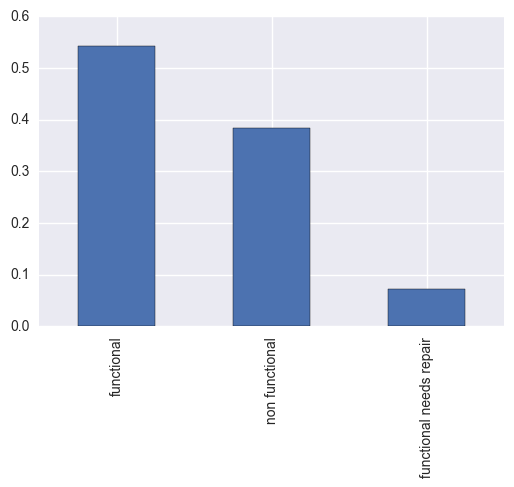

In [19]:
train.status_group.value_counts(normalize = True).plot(kind = 'bar')

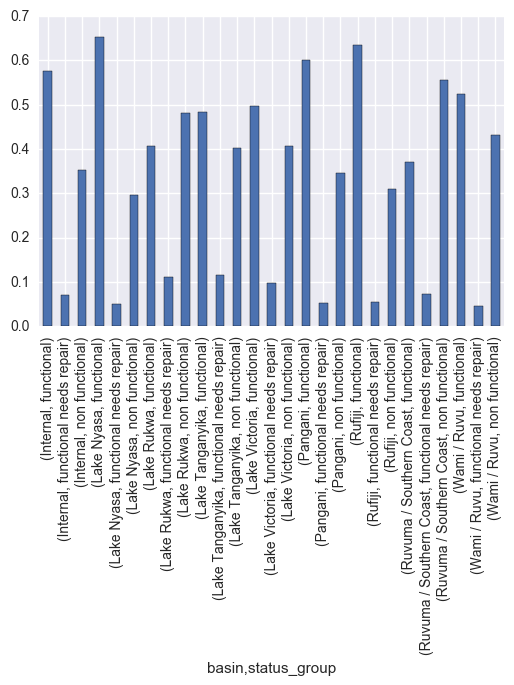

In [20]:
train.groupby('basin').status_group.value_counts(normalize = True,sort=False).plot(kind = 'bar')

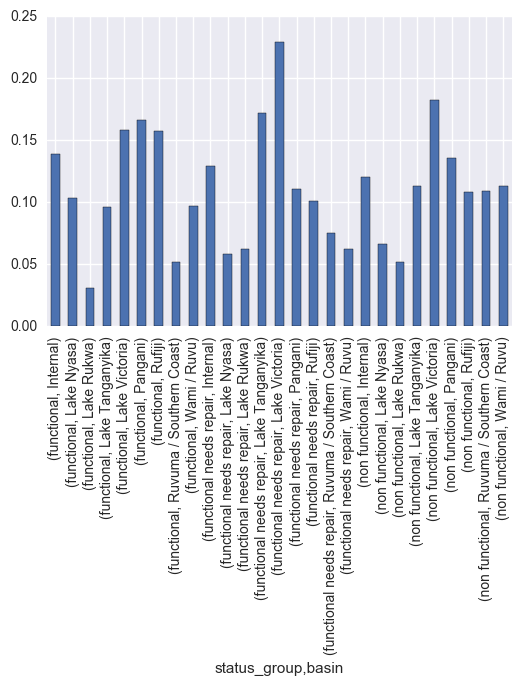

In [21]:
train.groupby('status_group').basin.value_counts(normalize = True,sort=False).plot(kind = 'bar')

In [57]:
train.groupby('status_group').basin.value_counts(normalize = True,sort=False)

status_group             basin                  
functional               Internal                   0.138938
                         Lake Nyasa                 0.103041
                         Lake Rukwa                 0.030999
                         Lake Tanganyika            0.096314
                         Lake Victoria              0.158095
                         Pangani                    0.166527
                         Rufiji                     0.157103
                         Ruvuma / Southern Coast    0.051768
                         Wami / Ruvu                0.097213
functional needs repair  Internal                   0.129025
                         Lake Nyasa                 0.057911
                         Lake Rukwa                 0.062543
                         Lake Tanganyika            0.171879
                         Lake Victoria              0.229094
                         Pangani                    0.110493
                         Rufiji     

In [93]:
train.groupby('basin').status_group.value_counts(normalize = True,sort=False).unstack()

status_group,functional,functional needs repair,non functional
basin,,,
Internal,0.575723,0.071548,0.352730
Lake Nyasa,0.653687,0.049164,0.297148
Lake Rukwa,0.407498,0.110024,0.482478
Lake Tanganyika,0.483053,0.115361,0.401586
Lake Victoria,0.497658,0.096507,0.405835
Pangani,0.600895,0.053356,0.345749
Rufiji,0.635406,0.054789,0.309804
Ruvuma / Southern Coast,0.371689,0.072557,0.555753
Wami / Ruvu,0.523802,0.044931,0.431268


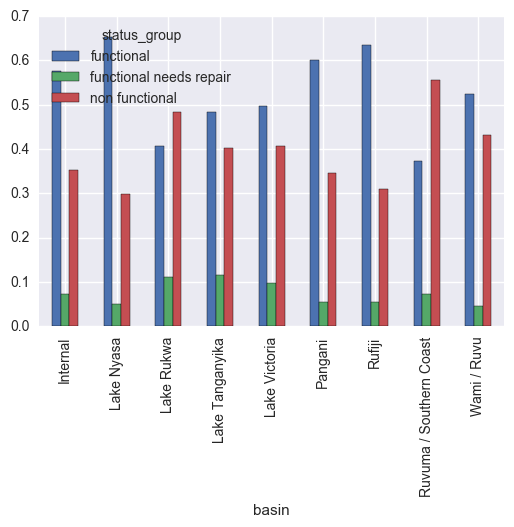

In [101]:

train.groupby('basin').status_group.value_counts(normalize = True).unstack().plot(kind='bar')
plt.figure(figsize=(20,8))
#need to add ascending for functional, needs repair, non functional
#need to figure out how move the legend to somewhere else

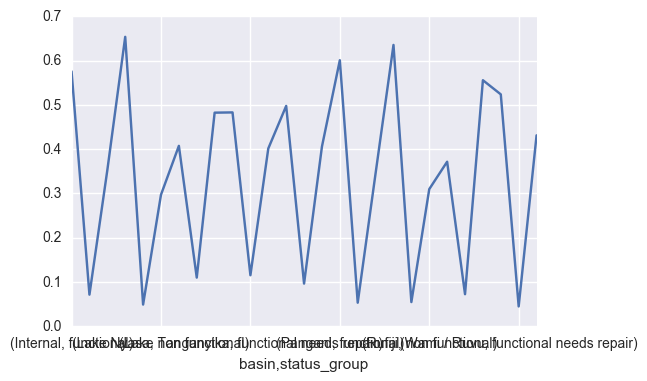

In [78]:
train.groupby('basin').status_group.value_counts(normalize = True,sort=False).plot()

In [71]:
train.pivot_table(index = 'basin',
                  columns='status_group',
           aggfunc = 'count')

id                                         \
status_group            functional functional needs repair non functional   
basin                                                                       
Internal                 4482       557                     2746            
Lake Nyasa               3324       250                     1511            
Lake Rukwa               1000       270                     1184            
Lake Tanganyika          3107       742                     2583            
Lake Victoria            5100       989                     4159            
Pangani                  5372       477                     3091            
Rufiji                   5068       437                     2471            
Ruvuma / Southern Coast  1670       326                     2497            
Wami / Ruvu              3136       269                     2582            

                        amount_tsh                                         \
status_group            functional functional needs repair non functional   
basin                                                                       
Internal                 4482       557                     2746            
Lake Nyasa               3324       250                     1511            
Lake Rukwa               1000       270                     1184            
Lake Tanganyika          3107       742                     2583            
Lake Victoria            5100       989                     4159            
Pangani                  5372       477                     3091            
Rufiji                   5068       437                     2471            
Ruvuma / Southern Coast  1670       326                     2497            
Wami / Ruvu              3136       269                     2582            

                        date_recorded                                         \
status_group               functional functional needs repair non functional   
basin                                                                          
Internal                 4482          557                     2746            
Lake Nyasa               3324          250                     1511            
Lake Rukwa               1000          270                     1184            
Lake Tanganyika          3107          742                     2583            
Lake Victoria            5100          989                     4159            
Pangani                  5372          477                     3091            
Rufiji                   5068          437                     2471            
Ruvuma / Southern Coast  1670          326                     2497            
Wami / Ruvu              3136          269                     2582            

                        gps_height                                         \
status_group            functional functional needs repair non functional   
basin                                                                       
Internal                 4482       557                     2746            
Lake Nyasa               3324       250                     1511            
Lake Rukwa               1000       270                     1184            
Lake Tanganyika          3107       742                     2583            
Lake Victoria            5100       989                     4159            
Pangani                  5372       477                     3091            
Rufiji                   5068       437                     2471            
Ruvuma / Southern Coast  1670       326                     2497            
Wami / Ruvu              3136       269                     2582            

                         longitude                                         \
status_group            functional functional needs repair non functional   
basin                                                                       
Internal                 4482       557                     2746 

In [87]:
train[['basin','status_group']].pivot_table(index = 'status_group',
                                            columns = 'status_group',
                                            values = 'status_group',
                                           aggfunc = 'count')

KeyError: 'Level status_group not found'

In [92]:
train[['basin','status_group']]

,basin,status_group
0,Lake Nyasa,functional
1,Lake Victoria,functional
2,Pangani,functional
3,Ruvuma / Southern Coast,non functional
4,Lake Victoria,functional
5,Pangani,functional
6,Internal,non functional
7,Lake Tanganyika,non functional
8,Lake Tanganyika,non functional
9,Lake Victoria,functional


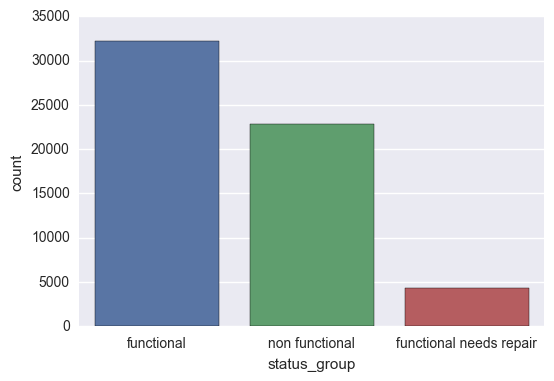

In [22]:
sns.countplot(x='status_group',data = train)

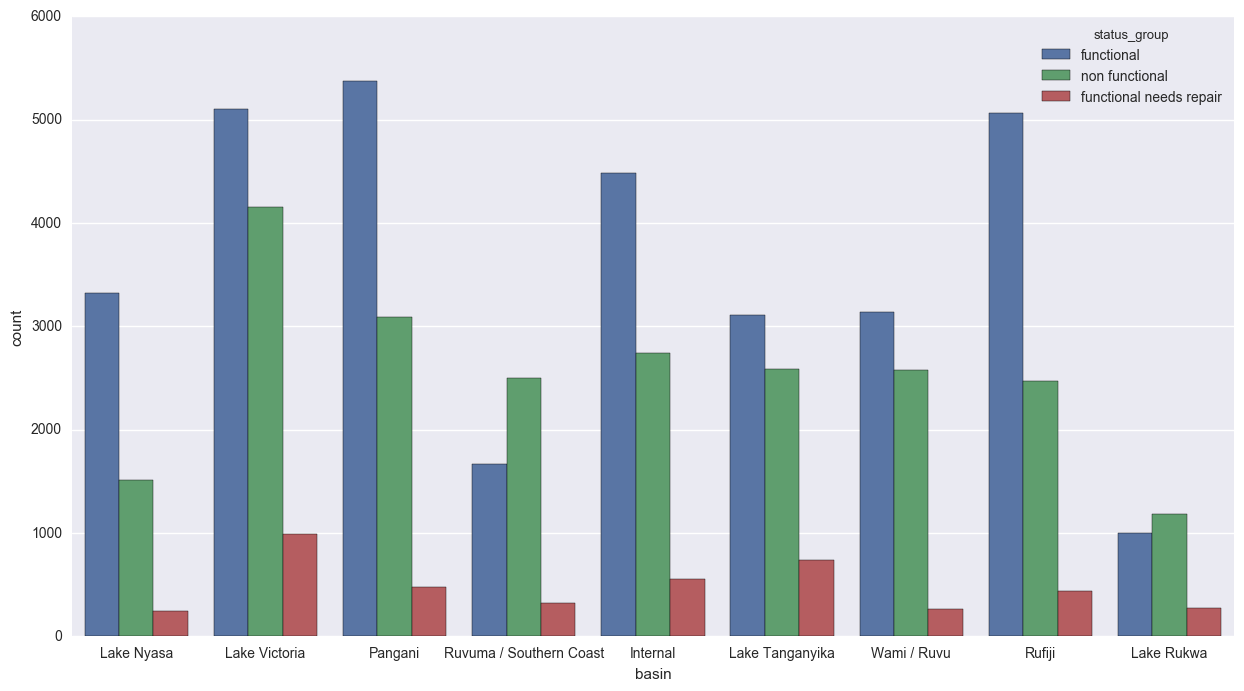

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x='basin',hue='status_group',data = train)

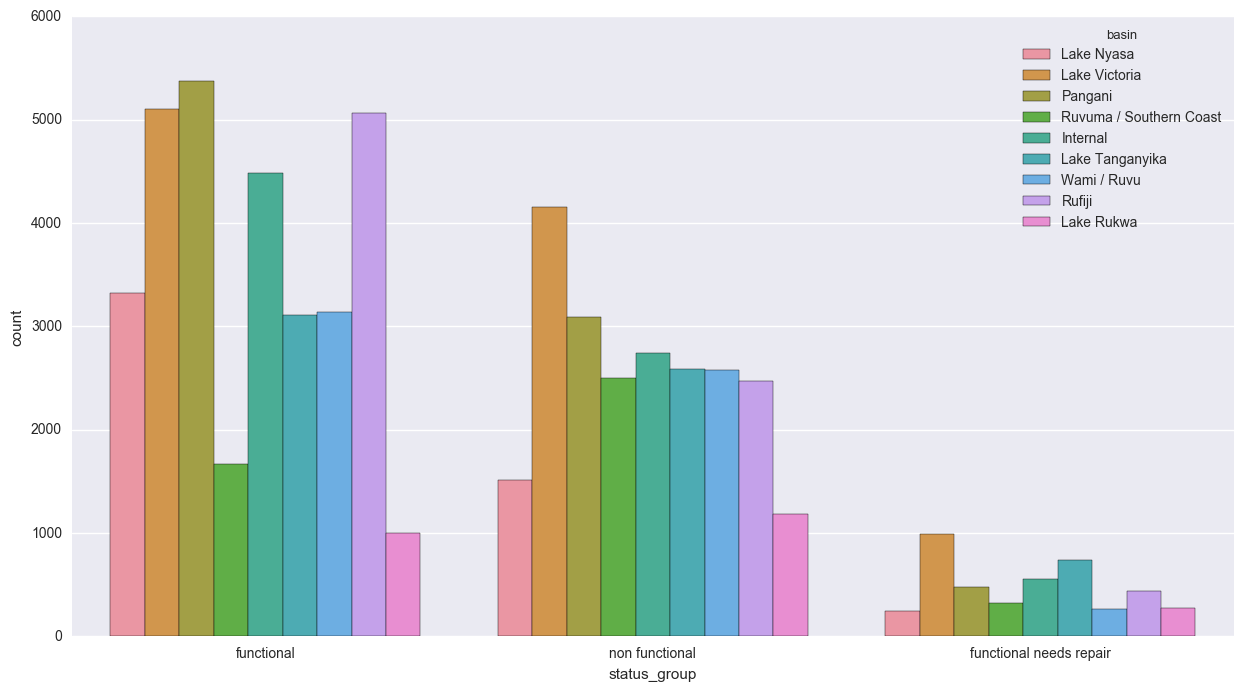

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x='status_group',hue='basin',data = train)

In [25]:
#train.pivot(index = 'status_group',columns='basin')

In [39]:
train.pivot_table(index = 'status_group',
           aggfunc = 'count',
                 margins = True)

,amount_tsh,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,gps_height,id,latitude,lga,longitude,management,management_group,num_private,payment,payment_type,population,quality_group,quantity,quantity_group,recorded_by,region,region_code,source,source_class,source_type,subvillage,ward,water_quality,waterpoint_type,waterpoint_type_group,wpt_name
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32259.0,32054.0,32259.0,32259.0,32259.0,32259.0,32259.0
functional needs repair,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4317.0,4316.0,4317.0,4317.0,4317.0,4317.0,4317.0
non functional,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22824.0,22659.0,22824.0,22824.0,22824.0,22824.0,22824.0
All,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0,59029.0


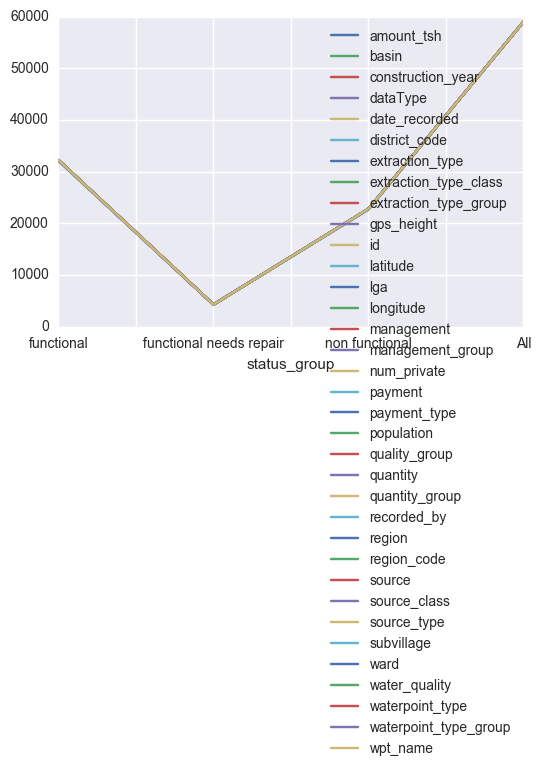

In [43]:
train.pivot_table(
    index = 'status_group',
    aggfunc = 'count',
    margins = True).plot()

In [47]:
pd.crosstab(train["status_group"],train["basin"],margins=True)

basin,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,All
status_group,,,,,,,,,,
functional,4482,3324,1000,3107,5100,5372,5068,1670,3136,32259
functional needs repair,557,250,270,742,989,477,437,326,269,4317
non functional,2746,1511,1184,2583,4159,3091,2471,2497,2582,22824
All,7785,5085,2454,6432,10248,8940,7976,4493,5987,59400


In [56]:
def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(train["status_group"],train["basin"],margins=True).apply(percConvert, axis=1)

basin,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,All
status_group,,,,,,,,,,
functional,0.138938,0.103041,0.030999,0.096314,0.158095,0.166527,0.157103,0.051768,0.097213,1.0
functional needs repair,0.129025,0.057911,0.062543,0.171879,0.229094,0.110493,0.101228,0.075515,0.062312,1.0
non functional,0.120312,0.066202,0.051875,0.113170,0.182220,0.135428,0.108263,0.109402,0.113127,1.0
All,0.131061,0.085606,0.041313,0.108283,0.172525,0.150505,0.134276,0.075640,0.100791,1.0


In [53]:
def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(train["status_group"],train["basin"]).apply(percConvert, axis=1)#.plot(kind='bar')

basin,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu
status_group,,,,,,,,,
functional,1.429209,1.059949,0.318878,0.990753,1.626276,1.713010,1.616071,0.532526,1.0
functional needs repair,2.070632,0.929368,1.003717,2.758364,3.676580,1.773234,1.624535,1.211896,1.0
non functional,1.063517,0.585205,0.458559,1.000387,1.610767,1.197134,0.957010,0.967080,1.0


In [ ]:
#look up cross tab vs. pivot differences

In [44]:
def convert(x):
    if x == 'functional':
        return(1)
    if x == 'non functional':
        return(2)
    if x == 'funtional needs repair':
        return(0)
    else:
        return(4)

In [47]:
train['test'] = train['status_group'].apply(convert)